In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as K
from scipy import misc



In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

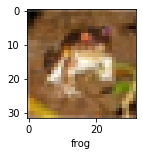

In [8]:
plot_sample(X_train, y_train, 0)

In [9]:
import cv2

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 81s 51ms/step - loss: 1.7177 - accuracy: 0.3729
Epoch 2/5
1563/1563 [==============================] - 84s 53ms/step - loss: 1.1455 - accuracy: 0.5974
Epoch 3/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.0018 - accuracy: 0.6496
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9060 - accuracy: 0.6868
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8475 - accuracy: 0.7081


In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.9505 - accuracy: 0.6702


[0.950502336025238, 0.670199990272522]

In [19]:
y_pred = cnn.predict(X_test)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[8, 8, 8, 0, 6]

In [21]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [34]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('1.png', target_size = (32,32))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
pred = np.argmax(result)
pred

8

In [35]:
if pred == 0:
    print('Airplane')
elif pred == 1:
    print('automobile')
elif pred == 2:
    print('bird')
elif pred == 3:
    print('cat')
elif pred == 4:
    print('deer')
elif pred == 5:
    print('dog')
elif pred == 6:
    print('frog')
elif pred == 7:
    print('horse')
elif pred == 8:
    print('ship')
else:
    print('truck')

ship
